# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padronização de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 07/02/2022;

- Monitoria Projeto 01: 16/02/2022 (possivelmente);

- Data de Entrega: 18/02/2022;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoAluno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

In [1]:
#importação de módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#carga
df_ori = pd.read_csv('COVID.csv',index_col=0)
#amostra dados
print(df_ori.head())
#descrição
print(df_ori.info())
#balanço das respostas
print(df_ori.groupby('covid_res').size())

   sex  patient_type  intubed  pneumonia  age  pregnancy  diabetes  copd  \
0    0             1      NaN        0.0   27        NaN       0.0   0.0   
1    0             1      NaN        0.0   24        NaN       0.0   0.0   
2    1             0      0.0        0.0   54        0.0       0.0   0.0   
3    0             0      0.0        1.0   30        NaN       0.0   0.0   
4    1             0      0.0        0.0   60        0.0       1.0   0.0   

   asthma  inmsupr  hypertension  other_disease  cardiovascular  obesity  \
0     0.0      0.0           0.0            0.0             0.0      0.0   
1     0.0      0.0           0.0            0.0             0.0      0.0   
2     0.0      0.0           0.0            0.0             0.0      1.0   
3     0.0      0.0           0.0            0.0             0.0      0.0   
4     0.0      0.0           1.0            0.0             1.0      0.0   

   renal_chronic  tobacco  contact_other_covid  covid_res  icu  
0            0.0     

In [4]:
#df_ori['nm_age']=pd.qcut(df_ori['age'],4,labels=[0,1,2,3])
df_tret = df_ori.copy()
#df_tret.drop(columns='age',inplace=True)
df_tret.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [45]:
print(df_ori.groupby(['covid_res','nm_age','cardiovascular','diabetes']).size())
print(df_ori.groupby(['covid_res','nm_age','pneumonia']).size())
print(df_ori.groupby(['covid_res','nm_age','sex']).size())



covid_res  nm_age  cardiovascular  diabetes
0          0       0.0             0.0         87128
                                   1.0           951
                   1.0             0.0           756
                                   1.0            49
           1       0.0             0.0         66833
                                   1.0          2522
                   1.0             0.0           583
                                   1.0            95
           2       0.0             0.0         57468
                                   1.0          7275
                   1.0             0.0           864
                                   1.0           333
           3       0.0             0.0         36473
                                   1.0         13265
                   1.0             0.0          1917
                                   1.0          1646
1          0       0.0             0.0         44233
                                   1.0           821
  

In [5]:
df_tret['pregnancy'].mask(df_tret['sex']==0,0,inplace=True) #não tem home gravido
df_tret.groupby(['pregnancy','sex']).size()


pregnancy  sex
0.0        0      253098
           1      241644
1.0        1        3614
dtype: int64

In [60]:
df_tret['n_comorbities']=df_tret[['pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco']].sum(axis=1)


In [68]:
df_tret['icu'].mask(df_tret['patient_type']==1,0,inplace=True)
df_tret['intubed'].mask(df_tret['patient_type']==1,0,inplace=True)

In [75]:
df_tret['contact_other_covid'].mask(df_tret['contact_other_covid'].isna(),0,inplace=True)

In [6]:
df_tret.dropna(inplace=True)


                          sex  patient_type   intubed  pneumonia       age  \
sex                  1.000000           NaN -0.048921  -0.077218 -0.026971   
patient_type              NaN           NaN       NaN        NaN       NaN   
intubed             -0.048921           NaN  1.000000   0.194050  0.050378   
pneumonia           -0.077218           NaN  0.194050   1.000000  0.202673   
age                 -0.026971           NaN  0.050378   0.202673  1.000000   
pregnancy            0.123370           NaN -0.026151  -0.075671 -0.118417   
diabetes             0.025993           NaN  0.043378   0.107196  0.275446   
copd                 0.030457           NaN  0.007393   0.021817  0.182973   
asthma               0.045669           NaN -0.015962  -0.023820 -0.026149   
inmsupr              0.027343           NaN  0.001999  -0.026347 -0.067671   
hypertension         0.055665           NaN  0.038063   0.095250  0.359856   
other_disease        0.030287           NaN  0.021904  -0.020404

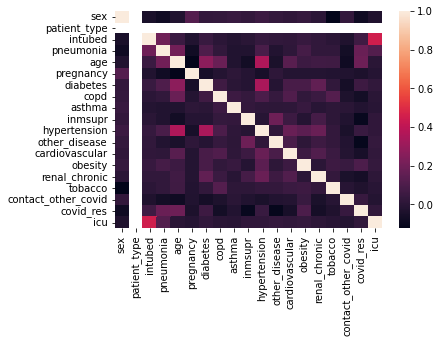

In [8]:
sns.heatmap(df_tret.corr())
print(df_tret.corr())

In [81]:
df_tret.drop(columns='covid_res').drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10420 entries, 0 to 499613
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  10420 non-null  int64   
 1   patient_type         10420 non-null  int64   
 2   intubed              10420 non-null  float64 
 3   pneumonia            10420 non-null  float64 
 4   pregnancy            10420 non-null  float64 
 5   diabetes             10420 non-null  float64 
 6   copd                 10420 non-null  float64 
 7   asthma               10420 non-null  float64 
 8   inmsupr              10420 non-null  float64 
 9   hypertension         10420 non-null  float64 
 10  other_disease        10420 non-null  float64 
 11  cardiovascular       10420 non-null  float64 
 12  obesity              10420 non-null  float64 
 13  renal_chronic        10420 non-null  float64 
 14  tobacco              10420 non-null  float64 
 15  contact_other_covi